# <font color='blue'>Estatística Descritiva Univariada quantitativa - parte 1</font>

In [5]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

# Verificando as versões dos pacotes instalados
pandasVersion = !pip show pandas
matplotlibVersion = !pip show matplotlib
print('Pandas', pandasVersion[1])
print("Matplotlib", matplotlibVersion[1])

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.12.5
Pandas Version: 2.2.2
Matplotlib Version: 3.9.2


## Estatística Descritiva Univariada quantitativa
<details>
    <summary>
        <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>&nbsp;&nbsp;Clique para mais detalhes</a>
    </summary>
    <br>
    
Estatísticas descritivas utilizadas com uma variável **quantitativa**: <br>
- Tabela de distribuição de frequências; <br>
- Gráficos de linhas, de dispersão, histograma e boxplot; <br>
- Medidas de posição ou localização; <br>
- Medidas de dispersão ou variabilidade; <br>
- Medidas de forma que são a assimetria e a curtose. <br>
    
</details>


In [6]:
# Importando os pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics as stat

In [7]:
# Coletando os dados
df = pd.read_csv('Dados/Tips/tips.csv')
# Renomenando as colunas
df.columns = ["Total da Conta", "Valor da Gorjeta", "Sexo", "Fumante", "Dia", "Horário", "Quantidade de Pessoas"]
df.head()

,Total da Conta,Valor da Gorjeta,Sexo,Fumante,Dia,Horário,Quantidade de Pessoas
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Tabela de Distribuição de Frequências - variáveis quantitativas discretas
<details>
    <summary>
        <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>&nbsp;&nbsp;Clique para mais detalhes</a>
    </summary>
    <br>
    
Variáveis **quantitativas** representam características de um indivíduo, objeto ou elemento resultantes de uma contagem ou de uma mensuração. <br>
As variáveis quantitativas que assumem valores provenientes de uma contagem são chamadas **discretas**, como por exemplo, o número de filhos ou o número de clientes.
    
</details>

In [8]:
# Definindo o nome da coluna que será analisada
variavelAnalisada = "Sexo"

# Frequência absoluta da variável variavel Analisada
fiVariavelAnalisada = df[variavelAnalisada].value_counts()

# Frequência relativa da variável variavel Analisada
friVariavelAnalisada = (fiVariavelAnalisada / df[variavelAnalisada].count())*100

# Frequência acumulada da variável variavel Analisada
facVariavelAnalisada = fiVariavelAnalisada.cumsum()

# Frequência relativa acumulada da variável variavel Analisada
fracVariavelAnalisada = (facVariavelAnalisada / df[variavelAnalisada].count())*100

# Criando um dicionário com todas as frequências 
frequencias = {
                "Fi": fiVariavelAnalisada,
                "Fri %": round(friVariavelAnalisada, 2),
                "Fac": facVariavelAnalisada,
                "Frac %": round(fracVariavelAnalisada, 2)
}

# Criando um DataFrame a partir de um dicionário
df2 = pd.DataFrame(frequencias)

# Reiniciando os índices do DataFrame
df2 = df2.reset_index()

# Renomeando as colunas
df2.columns = [variavelAnalisada, "Fi", "Fri %", "Fac", "Frac %"]
df2

,Sexo,Fi,Fri %,Fac,Frac %
0,Male,157,64.34,157,64.34
1,Female,87,35.66,244,100.00


### Tabela de Distribuição de Frequências - variáveis quantitativas contínuas
<details>
    <summary>
        <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>&nbsp;&nbsp;Clique para mais detalhes</a>
    </summary>
    <br>
    
As variáveis quantitativas **contínuas** assumem um valor dentro de um intervalo de números. Normalmente, são obtidas a partir de um processo de mensuração, como por exemplo peso, altura e renda de um indivíduo. <br>
Já que as variáveis quantitativas **contínuas** assumem um valor dentro de um intervalo de números, não faz sentido calcular a frequência para cada valor, visto que os valores tendem a não se repetir. <br>
Sendo assim, tornar-se interessante **agrupar os dados em classes ou faixas**. <br>
Para determinar o número de classes, podemos utilizar a expressão de Sturges, definida por: <br>
- k = 1 + 3,3 * log(n) <br>

Onde *k* é a quantidade de classes e deve ser um número inteiro e *n* é o tamanho da amostra. <br><br>
Para determinar o intervalo das classes, utilizamos a expressão: <br>
- h = A/k <br>

Onde o valor de *h* é aproximado para o maior inteiro e a amplitude da amostra *A = valor máximo - valor mínimo*. E dividimos *A* pela quantidade de classes. 

    
</details>

In [9]:
# Definindo o nome da variável que será analisada
variavelAnalisada = "Valor da Gorjeta"

In [10]:
# Calculando a quantidade de classes da variável analisada
n = df[variavelAnalisada].count()
print(n)
# Fórmula da Regra de Sturges
k = round(1+3.3*math.log10(n))
k

244


9

In [11]:
# Calculando a amplitudade da amostra 
a = max(df[variavelAnalisada])-min(df[variavelAnalisada])
print(a)
# Calculando o intervalo entre as classes
h = round(a/k)
h

9.0


1

In [12]:
# Criando um dicionário vazio
frequencias = {}

# Criando uma lista vazia
fiVariavelAnalisada = []

contador = 0
while contador < k:
    if len(frequencias) == 0:
        frequencias["Classe"] = ["[" + str(min(df[variavelAnalisada])) + "-" + str(min(df[variavelAnalisada])+h) + "["]
        fiVariavelAnalisada.append(len(df[(df[variavelAnalisada] >= min(df[variavelAnalisada])) & (df[variavelAnalisada] < min(df[variavelAnalisada])+h)]))
        aux = min(df[variavelAnalisada])+h
        contador+=1
    elif contador == k-1:
        frequencias["Classe"].append("[" + str(aux) + "-" + str(aux+h) + "]")
        fiVariavelAnalisada.append(len(df[(df[variavelAnalisada] >= aux) & (df[variavelAnalisada] <= aux+h+1)]))
        contador+= 1
    else:    
        frequencias["Classe"].append("[" + str(aux) + "-" + str(aux+h) + "[")
        fiVariavelAnalisada.append(len(df[(df[variavelAnalisada] >= aux) & (df[variavelAnalisada] < aux+h)]))
        aux+=h
        contador+= 1

# Convertendo o objeto do tipo lista para o tipo Série do Pandas
fiVariavelAnalisada = pd.Series(fiVariavelAnalisada)

# Frequência absoluta da Variável Analisada
frequencias["Fi"] = fiVariavelAnalisada

# Frequência relativa da variável Variavel Analisada
friVariavelAnalisada = round((fiVariavelAnalisada / df[variavelAnalisada].count())*100,2)
frequencias["Fri %"] = friVariavelAnalisada

# Frequência acumulada da variável Variavel Analisada
facVariavelAnalisada = fiVariavelAnalisada.cumsum()
frequencias["Fac"] = facVariavelAnalisada

# Frequência relativa acumulada da variável Variavel Analisada
fracVariavelAnalisada = round((facVariavelAnalisada / df[variavelAnalisada].count())*100,2)
frequencias["Frac %"] = fracVariavelAnalisada

df3  = pd.DataFrame(frequencias)
df3

,Classe,Fi,Fri %,Fac,Frac %
0,[1.0-2.0[,45,18.44,45,18.44
1,[2.0-3.0[,78,31.97,123,50.41
2,[3.0-4.0[,68,27.87,191,78.28
3,[4.0-5.0[,25,10.25,216,88.52
4,[5.0-6.0[,20,8.20,236,96.72
5,[6.0-7.0[,5,2.05,241,98.77
6,[7.0-8.0[,1,0.41,242,99.18
7,[8.0-9.0[,0,0.00,242,99.18
8,[9.0-10.0],2,0.82,244,100.00


### Histograma

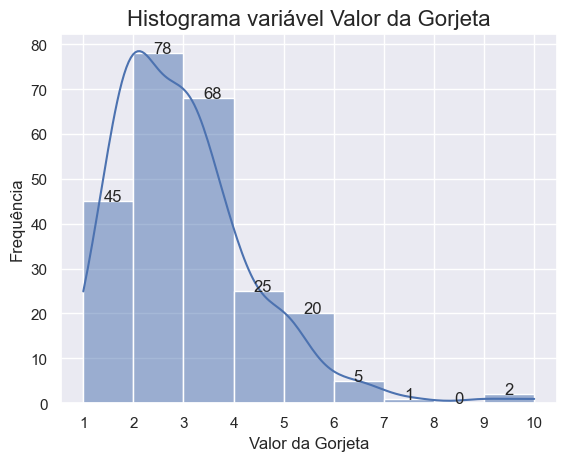

In [13]:
# Define o tema utilizado.
sns.set_theme(style="darkgrid") 

# Desenhando um histograma
ax = sns.histplot(df[variavelAnalisada], bins=k, kde=True)
ax.set_title("Histograma variável " + variavelAnalisada, fontsize = 16)
ax.set_xlabel(variavelAnalisada, fontsize = 12)
ax.set_ylabel("Frequência", fontsize = 12)
ax.set_xticks(np.arange(min(df[variavelAnalisada]), max(df[variavelAnalisada])+1, h))
for p in ax.patches:
    _x = p.get_x() + (p.get_width()) / 2 - 0.1
    _y = p.get_y() + p.get_height()
    value = int(p.get_height())
    ax.text(_x, _y, value, ha="left")

In [14]:
# Verificando a quantidade de ocorrências da classe [1-2[
len(df[(df["Valor da Gorjeta"] >= 1) & (df["Valor da Gorjeta"] < 2)])

45

### Medidas-resumo
<details>
    <summary>
        <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>&nbsp;&nbsp;Clique para mais detalhes</a>
    </summary>
    <br>

As informações contidas em um conjunto de dados podem ser resumidas por meio de medidas numéricas chamadas **medidas-resumo**. <br>
As medidas-resumo mais utilizadas em estatística descritiva univariada têm como objetivo principal a representação do comportamento da variável analisada por meio de seus valores centrais e não centrais, por suas dispersões ou formas de distribuição dos seus valores em torno da média. <br>
As medidas-resumo mais utilizadas em estatística descritiva univariada são: <br>
- Medidas de posição ou localização; <br>
- Medidas de dispersão ou variabilidade; <br>
- Medidas de forma que são a assimetria e a curtose. <br>
    
Obs.: **Essas medidas são calculadas para variáveis quantitativas**. A única exceção é em relação à moda, que é uma medida de tendência central que fornece o valor mais frequente de determinada variável, podendo assim também ser calculada para variáveis categóricas. 

</details>

### Medidas de posição ou localização
<details>
    <summary>
        <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>&nbsp;&nbsp;Clique para mais detalhes</a>
    </summary>
    <br>

As medidas de posição ou localização fornecem valores que caracterizam o comportamento de uma série de dados, indicando a posição ou localização dos dados em relação ao eixo dos valores assumidos pela variável analisada. <br>
As medidas de posição ou localização são subdivididas em: <br>
1. Medidas de tendência central: <br>
    1.1 - média; <br>
    1.2 - mediana; <br>
    1.3 - moda. <br>
2. Medidas separatrizes: <br>
    2.1 - quartis; <br>
    2.2 - decis; <br>
    2.3 - percentis. <br>

</details>

### Média aritmética

A média aritmética é a soma do total dos valores de determinada variável quantitativa (discreta ou contínua) dividida pelo número total de observações. 

In [15]:
# Criando uma lista
notas = [5.7, 6.5, 6.9, 8.3, 8.0, 4.2, 6.3, 7.4, 5.8, 6.9]
notas

[5.7, 6.5, 6.9, 8.3, 8.0, 4.2, 6.3, 7.4, 5.8, 6.9]

In [16]:
# Calculando a média das notas
soma = 0
for i in notas:
    soma += i
else:
    print("A média aritmética das notas é", soma / len(notas))

A média aritmética das notas é 6.6


In [17]:
# Calculando a média utilizando o NumPy
np.mean(notas)

6.6

### Média ponderada

A média ponderada é calculada atribuindo diferentes pesos para cada valor da variável. Na média ponderada somamos os produtos dos valores da variável pelos seus respectivos pesos e dividimos o resultado pela soma dos pesos. 

In [18]:
# Criando listas
notaBimestre = [4.5, 7.0, 5.5, 6.5]
peso = [1, 2, 3, 4]

In [19]:
# Calculando a média ponderada
somaDasNotas = 0
somaDosPesos = 0
j = 0
for i in notaBimestre:
    somaDasNotas += i * peso[j]
    somaDosPesos += peso[j]
    j += 1
else:
    print("A média ponderada das notas é", somaDasNotas / somaDosPesos)

A média ponderada das notas é 6.1


In [20]:
# Calculando a média ponderada utilizando o NumPy
np.average(notaBimestre, weights = peso)

6.1

Na média ponderada, os pesos podem ser substituídos pela frequência absoluta de uma variável.

In [21]:
# Criando um dicionário
dicionario = {
    "Notas": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Quantidade de Entrevistados": [9, 12, 15, 18, 24, 26, 5, 7, 3, 1]
}
# Convertendo o dicinário em um Dataframe
df4 = pd.DataFrame(dicionario)
df4

,Notas,Quantidade de Entrevistados
0,1,9
1,2,12
2,3,15
3,4,18
4,5,24
5,6,26
6,7,5
7,8,7
8,9,3
9,10,1


In [22]:
# Calculando a média ponderada utilizando o NumPy
np.average(df4.Notas, weights = df4["Quantidade de Entrevistados"])

4.616666666666666

### Mediana
Mediana é uma medida de localização do centro da distribuição de um conjunto de dados ordenados de forma crescente. Seu valor separa a série em duas partes iguais, de modo que 50% dos elementos são menores ou iguais à mediana e os outros 50% são maiores ou iguais à mediana. <br>
A mediana também é conhecida como segundo quartil.

In [23]:
# Criando um dicionário
dicionario = {
    "Mês": ["jan", "fev", "mar", "abr", "mai", "jun", "jul", "ago", "set", "out", "nov", "dez"],
    "Produção": [210, 180, 203, 195, 208, 230, 185, 190, 200, 182, 205, 196]
}
df5 = pd.DataFrame(dicionario)
df5

,Mês,Produção
0,jan,210
1,fev,180
2,mar,203
3,abr,195
4,mai,208
5,jun,230
6,jul,185
7,ago,190
8,set,200
9,out,182


In [24]:
# Calculando a mediana com o NumPy
np.median(df5["Produção"])

198.0

In [25]:
# Calculando a média com NumPy
np.mean(df5["Produção"])

198.66666666666666

In [26]:
# Alterando um valor específico no DataFrame
df5['Produção'] = df5['Produção'].replace(230,400)
df5

,Mês,Produção
0,jan,210
1,fev,180
2,mar,203
3,abr,195
4,mai,208
5,jun,400
6,jul,185
7,ago,190
8,set,200
9,out,182


In [27]:
# Calculando a média com NumPy
np.mean(df5["Produção"])

212.83333333333334

In [28]:
# Calculando a mediana com o NumPy
np.median(df5["Produção"])

198.0

In [29]:
# Criando um array NumPy
array1 = np.arange(7)
array1

array([0, 1, 2, 3, 4, 5, 6])

In [30]:
# Calculando a mediana com o NumPy
np.median(array1)

3.0

In [31]:
# Criando um array NumPy
array2 = np.arange(8)
array2

array([0, 1, 2, 3, 4, 5, 6, 7])

In [32]:
# Calculando a mediana com o NumPy
np.median(array2)

3.5

### Moda
A moda de uma série de dados corresponde a observação que ocorre com maior frequência. A moda é a única medida de posição que também pode ser utilizada para variáveis categóricas, já que essas variáveis permitem apenas o cálculo de frequências. 

In [33]:
# Criando uma lista
lista = [2,5,7,4,1,9,5,9,2,6,7,9,4,3,5,7]
lista

[2, 5, 7, 4, 1, 9, 5, 9, 2, 6, 7, 9, 4, 3, 5, 7]

In [34]:
# Utilizando o método mode
stat.mode(lista)

5

In [35]:
# Utilizando o método multimode
stat.multimode(lista)

[5, 7, 9]

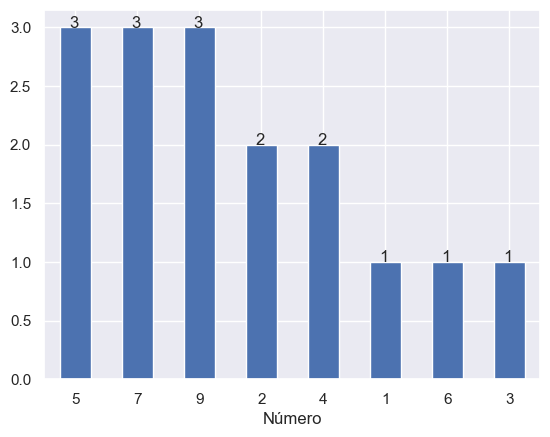

In [36]:
# Visualizando a moda de forma gráfica

# Criando um DataFrame
df6 = pd.DataFrame(lista, columns = ["Número"])

# Desenhando um gráfico de barras
ax = df6["Número"].value_counts().plot.bar(rot=0)
for p in ax.patches:
    _x = p.get_x() + (p.get_width()) / 2 - 0.1
    _y = p.get_y() + p.get_height()
    value = int(p.get_height())
    ax.text(_x, _y, value, ha="left")
plt.show()

In [34]:
# Visualizando a moda utilizando o Pandas
df6.mode()

,Número
0,5
1,7
2,9


### Medidas separatrizes
<details>
    <summary>
        <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>&nbsp;&nbsp;Clique para mais detalhes</a>
    </summary>
    <br>

- **Quartis** são medidas de posição que dividem um conjunto de dados, ordenados em forma crescente, em 4 partes com dimensões iguais. Assim, o 1° quartil *Q1* é o valor que representa 25% dos dados. Isso significa que abaixo dele estão 25% dos dados e acima estão 75%. O 2° quartil *Q2* corresponde à mediana, indicando que 50% dos dados são menores e 50% são maiores a *Q2*. Já o 3° quartil *Q3* é o valor que representa 75% dos dados, ou seja, acima dele estão 25% e abaixo estão 75% dos dados.<br>
- **Decis** são medidas de posição que dividem um conjunto de dados, ordenados em forma crescente, em dez partes. Desta forma, o 1° decil *D1* indica que 10% dos dados são inferiores a *D1*, ou que 90% dos dados são superiores à *D1*. O 2° decil *D2* indica que 20% dos dados são inferiores a *D2*, ou que 80% dos dados são superiores à *D2*. E assim sucessivamente, até o 9° decil *D9*, que indica que 90% dos dados são inferiores a *D9*, ou que 10% dos dados são superiores a *D9*. <br> 
- **Percentis** são medidas de posição que dividem um conjunto de dados, ordenados em forma crescente, em cem partes iguais. Sendo assim, o 1° percentil *P1* indica que 1% dos dados é inferior *P1*, ou que 99% dos dados são superiores a *P1*. O 2° percentil *P2* indica que 2% dos dados são inferiores a *P2* ou que 98% dos dados são superiores a *P2*. E assim sucessivamente, até 99° percentil *P99*, que indica que 99% dos dados são inferiores a *P99* ou que 1% dos dados é superior a *P99*. <br>

</details>

In [35]:
# Criando um array
array = np.arange(21)
array

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [36]:
# Calculando o 1° quartil ou 25° percentil
np.percentile(array, 25)

5.0

In [37]:
# Calculando a mediana ou 2° quartil ou 5° decil ou 50° percentil
np.percentile(array, 50)

10.0

In [38]:
# Calculando o 16° percentil
np.percentile(array, 16)

3.2

**Outliers** são valores atípicos, ou seja, que se afastam da maioria dos valores encontrados no conjunto de dados. Também são conhecidos como valores discrepantes, anormais ou extremos. 

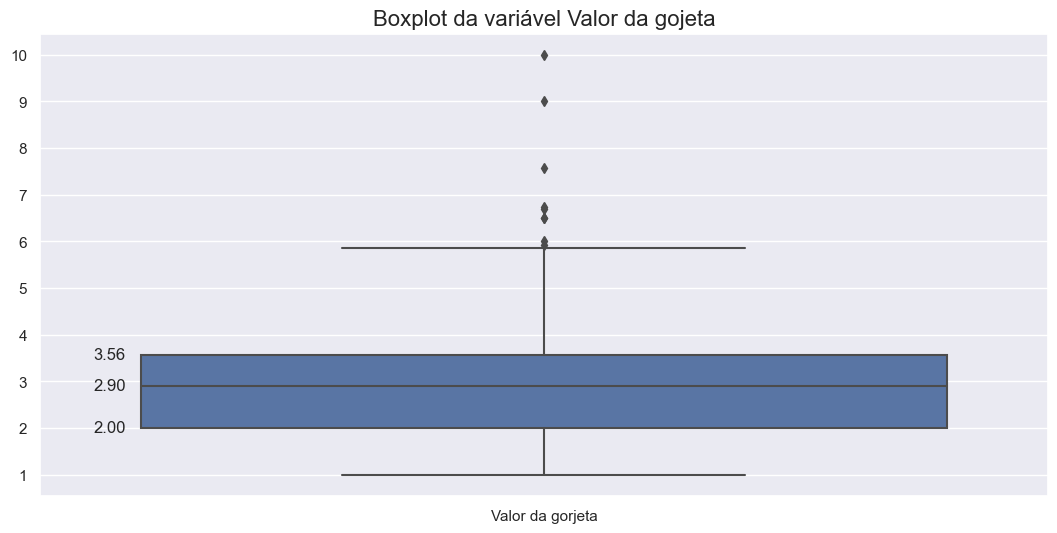

In [39]:
# Criando um boxplot
fig = plt.subplots(figsize=(13, 6))
ax = sns.boxplot(data=df["Valor da Gorjeta"])
ax.set_title("Boxplot da variável Valor da gojeta", fontsize = 16)
ax.set_xticklabels(["Valor da gorjeta"]) # exibe o nome da variável
ax.set_yticks(np.arange(1, 11, 1)) 
             
larguraBox = 0.63
i=0

# calcula o primeiro quartil (q1), o segundo (q2) e o terceiro quartil (q3)
q1, q2, q3 = df["Valor da Gorjeta"].quantile(0.25), df["Valor da Gorjeta"].quantile(0.5), df["Valor da Gorjeta"].quantile(0.75)

# Lista com os quartis
quartis = [q1, q2, q3]

# Exibe os quartis no gráfico
for q in quartis:
    x = i-larguraBox/2
    y = q
    ax.annotate('%.2f' % q, (x,y),
                xytext=(x-0.1, y), textcoords='data',
                va='center', ha='right')
plt.show()